In [1]:
import pandas as pd
import ccxt
import numpy as np
import scipy
from datetime import datetime
import time
import datetime as dt
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
exchange = ccxt.bittrex({'options': {'adjustForTimeDifference': True}})

df = pd.DataFrame([item[:2] for item in exchange.fetch_ohlcv('BTC/USDT', '1d')], columns=['date', 'price'])
df.set_index(['date'], inplace=True)
df.to_csv('BTC historical prices.csv')

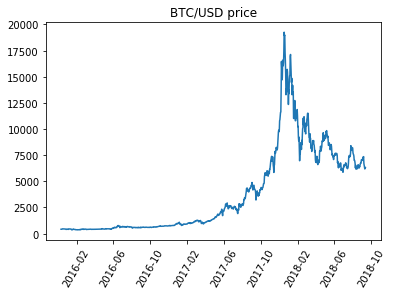

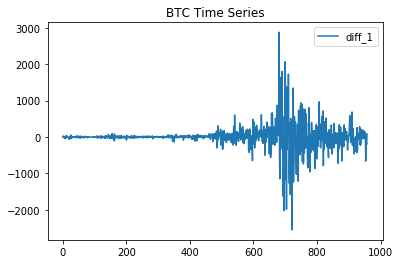

In [4]:
df = pd.read_csv('C:/Users/18047/Documents/Main/6 Data science specializations/Time series analysis/BTC historical prices.csv')
df['date'] /= 1000
df['date'] = pd.to_datetime(df['date'], unit='s')


plt.plot(df['date'], df['price'])
plt.xticks(rotation=60)
plt.title('BTC/USD price')
plt.show()

df['diff_1'] = df['price'] - df['price'].shift()
df.plot(y='diff_1')
plt.title('BTC Time Series')
plt.show()

In [5]:
from statsmodels.tsa.arima_model import ARIMA
orders = [(0, 1, 0), (1, 0, 0), (1, 0, 1), (1, 1, 1), (5, 0, 5)]
for order in orders:
    model = ARIMA(df['price'], order=order)
    model_fit = model.fit()
    print(model_fit.summary())
    print('\n\n\n')

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                  958
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -6917.940
Method:                           css   S.D. of innovations            331.058
Date:                Tue, 11 Sep 2018   AIC                          13839.880
Time:                        12:23:03   BIC                          13849.609
Sample:                             1   HQIC                         13843.585
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1618     10.696      0.576      0.565     -14.802      27.126




                              ARMA Model Results                              
Dep. Variable:                  price   No. Obse

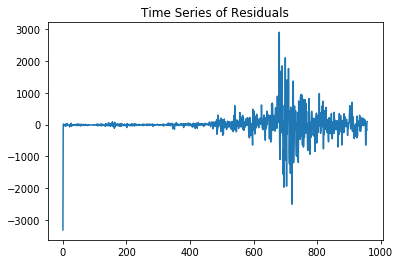

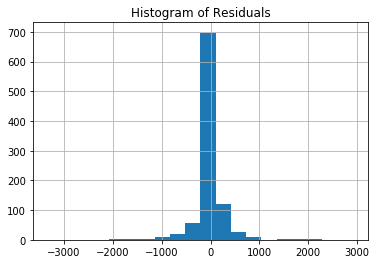

In [6]:
model = ARIMA(df['price'], order=(1, 0, 0))
model_fit = model.fit()

residuals = pd.DataFrame(model_fit.resid)
residuals.plot(legend=False)
plt.title('Time Series of Residuals')
plt.show()

residuals.hist(bins=20)
plt.title('Histogram of Residuals')
plt.show()